Chapter 19

# 梯度
Book_4《矩阵力量》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码通过符号计算和可视化来展示函数 $f(x_1, x_2) = x_1 - x_2$ 的梯度及其几何特性。代码首先定义了目标函数 $f(x_1, x_2) = x_1 - x_2$ 并计算其梯度向量，即偏导数组成的向量：
$$
\nabla f(x_1, x_2) = \left( \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2} \right) = (1, -1).
$$
代码接着使用数值网格来评估函数和梯度值，以便进行可视化。

在 3D 可视化部分，代码生成了 $f(x_1, x_2)$ 的线框图和等高线图。等高线反映出不同 $z$ 值的水平面，展示了 $f(x_1, x_2)$ 的整体变化趋势。黑色等高线表示 $z = 0$ 的等高线，即 $f(x_1, x_2) = 0$ 的水平位置。

在 2D 可视化中，代码在平面上绘制梯度矢量场，展示梯度方向和强度。在每个点，矢量场由单位向量和梯度的强度组成，梯度的大小由颜色表示。梯度的方向表示函数值增长最快的方向。等高线显示了 $f(x_1, x_2)$ 的不同值，这些值沿着函数方向不断变化，使得梯度场和等高线相互叠加，直观地展示了函数的变化趋势。

In [1]:
import sympy  # 导入符号计算库 sympy
import numpy as np  # 导入数值计算库 numpy
import matplotlib.pyplot as plt  # 导入绘图库 matplotlib.pyplot

## 定义符号变量和目标函数

In [2]:
x1, x2 = sympy.symbols('x1 x2')  # 定义符号变量 x1 和 x2

In [3]:
f_x = x1 - x2  # 定义目标函数 f(x) = x1 - x2
f_x

x1 - x2

## 计算目标函数的梯度

In [4]:
grad_f = [sympy.diff(f_x, var) for var in (x1, x2)]  # 计算目标函数的梯度
grad_f

[1, -1]

In [5]:
f_x_fcn = sympy.lambdify([x1, x2], f_x)  # 将符号表达式转换为 lambda 函数以便数值计算

## 将梯度转化为适用于 numpy 的双变量 lambda 函数

In [6]:
grad_fcn = sympy.lambdify([x1, x2], grad_f)  # 将梯度转换为 lambda 函数

## 创建网格以便绘制图像

In [7]:
xx1, xx2 = np.meshgrid(np.linspace(-4, 4, 41), np.linspace(-4, 4, 41))  # 生成 41x41 的网格

## 创建粗略网格用于梯度矢量场的绘制

In [8]:
xx1_, xx2_ = np.meshgrid(np.linspace(-4, 4, 10), np.linspace(-4, 4, 10))  # 生成 10x10 的网格
V = grad_fcn(xx1_, xx2_)  # 计算粗略网格上的梯度
V_z = np.ones_like(V[1])  # 创建与梯度方向一致的单位 z 轴分量

In [9]:
ff_x = f_x_fcn(xx1, xx2)  # 计算网格上目标函数的值

In [10]:
color_array = np.sqrt(V[0]**2 + V[1]**2)  # 计算颜色数组用于梯度强度的可视化
l_3D_vectors = np.sqrt(V[0]**2 + V[1]**2 + V_z**2)  # 计算 3D 矢量的长度

## 3D 可视化

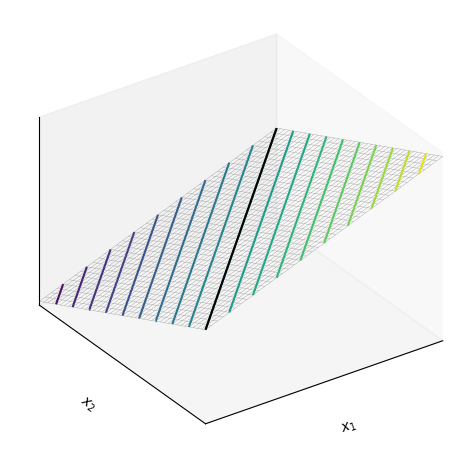

In [11]:
ax = plt.figure().add_subplot(projection='3d')  # 创建 3D 图形并添加子图
ax.plot_wireframe(xx1, xx2, ff_x, rstride=1,  # 绘制线框图
                  cstride=1, color=[0.5, 0.5, 0.5],  # 设置线框颜色
                  linewidth=0.2)  # 设置线框宽度
ax.contour3D(xx1, xx2, ff_x, 20)  # 绘制 3D 等高线
ax.contour3D(xx1, xx2, ff_x, levels=0, colors='k')  # 在 z=0 处绘制特殊的等高线

# 设置坐标轴参数
ax.xaxis.set_ticks([])  # 去除 x 轴刻度
ax.yaxis.set_ticks([])  # 去除 y 轴刻度
ax.zaxis.set_ticks([])  # 去除 z 轴刻度
plt.xlim(-4, 4)  # 设置 x 轴范围
plt.ylim(-4, 4)  # 设置 y 轴范围
ax.view_init(30, -125)  # 设置视角角度
ax.set_xlabel('$x_1$')  # 设置 x 轴标签
ax.set_ylabel('$x_2$')  # 设置 y 轴标签
ax.set_zlabel('$f(x_1,x_2)$')  # 设置 z 轴标签
ax.set_proj_type('ortho')
plt.tight_layout()  # 调整布局以适应图形窗口

## 2D 可视化`

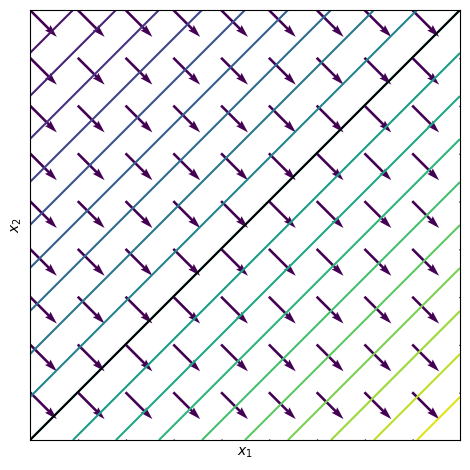

In [12]:
fig, ax = plt.subplots()  # 创建 2D 图形
plt.quiver(xx1_, xx2_, V[0], V[1], color_array,  # 绘制梯度矢量场
            angles='xy', scale_units='xy', scale=2,  # 设置矢量的角度和缩放
            edgecolor='none', facecolor='b')  # 设置矢量的颜色

plt.contour(xx1, xx2, ff_x, 20)  # 绘制等高线
plt.contour(xx1, xx2, ff_x, levels=0, colors='k')  # 在 z=0 处绘制特殊的等高线

ax.set_aspect('equal')  # 设置图形的纵横比
ax.xaxis.set_ticks([])  # 去除 x 轴刻度
ax.yaxis.set_ticks([])  # 去除 y 轴刻度
ax.set_xlabel(r'$x_1$')  # 设置 x 轴标签
ax.set_ylabel(r'$x_2$')  # 设置 y 轴标签
plt.tight_layout()  # 调整布局以适应图形窗口